# Libaries used

In [89]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Preprocessing

In [90]:
df = pd.read_csv("BankChurners.csv")
df.drop(df.columns[-2:], axis = 1, inplace= True)
df.drop(df.columns[0], axis =1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## Correlation visualization

C:\Users\Admin\AppData\Local\Temp\ipykernel_14728\3951493101.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[selected_features].corr()


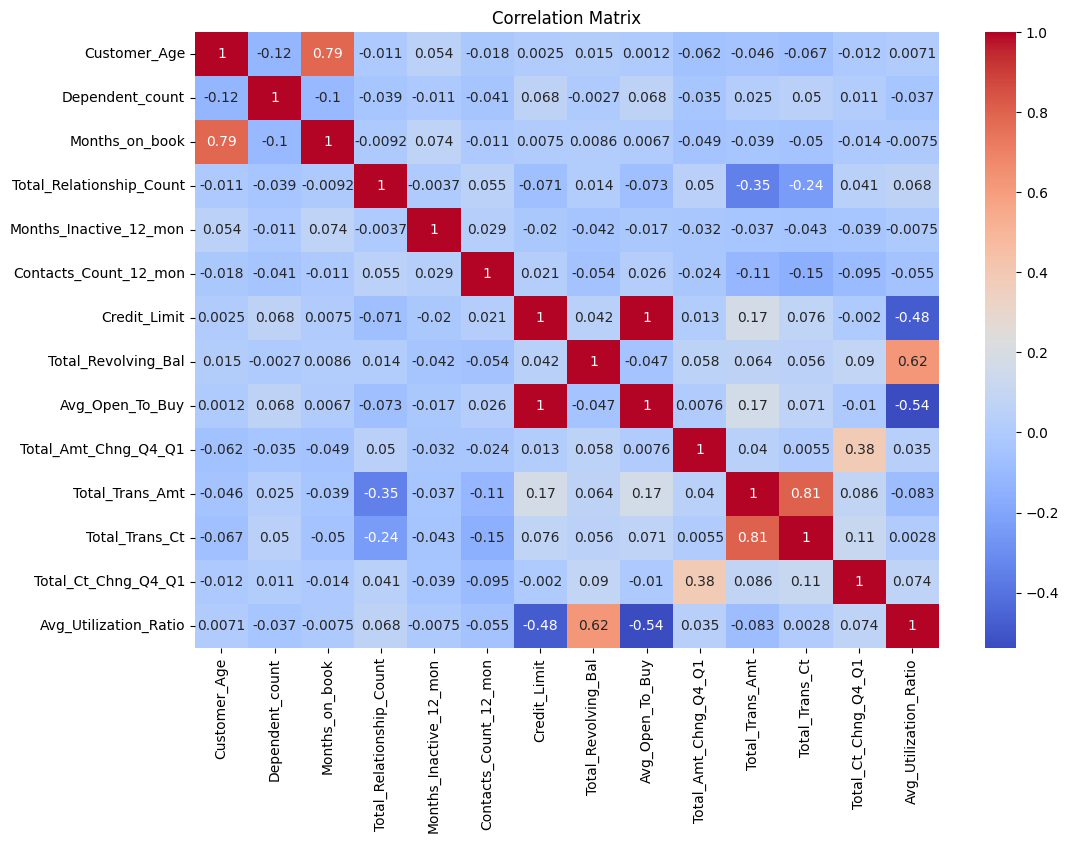

In [91]:
# Select the relevant features for correlation analysis
selected_features = ['Customer_Age', 'Gender', 'Dependent_count',
                     'Education_Level', 'Marital_Status', 'Income_Category',
                     'Card_Category', 'Months_on_book', 'Total_Relationship_Count',
                     'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
                     'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                     'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                     'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Create a correlation matrix
correlation_matrix = df[selected_features].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Features Encoding

In [92]:
#Encoding target
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

In [93]:
# Grouping 'Customer_Age' Feature
age_groups = [35, 45, 55, 65, 100]
group_names = ['35-44', '45-54', '55-64', '65+']
df['Customer_Age_Group'] = pd.cut(df['Customer_Age'], bins=age_groups, labels=group_names, right=False)


In [94]:
#Encoding categorical features
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Customer_Age_Group']
label_encoder = LabelEncoder()
df[categorical_features] = df[categorical_features].apply(label_encoder.fit_transform)

## Feature scaling

In [95]:
# Numerical Features
numerical_features = ['Months_on_book', 'Total_Relationship_Count',
                      'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                      'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                      'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df[numerical_features] = minmax_scaler.fit_transform(df[numerical_features])

In [96]:
#Encoded dataframe
print(df.head())

   Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               0            45       1                3                3   
1               0            49       0                5                2   
2               0            51       1                3                2   
3               0            40       0                4                3   
4               0            40       1                3                5   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               1                2              0        0.604651   
1               2                4              0        0.720930   
2               1                3              0        0.534884   
3               3                4              0        0.488372   
4               1                2              0        0.186047   

   Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
0                       0.8  ...               0.

## Split train&test

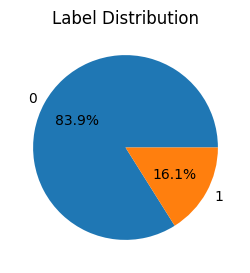

In [97]:
# Visualize label count
# Count the frequency of each label
label_counts = df['Attrition_Flag'].value_counts()

# Create a pie chart
plt.figure(figsize=(3, 3))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
# Add a title
plt.title('Label Distribution')

# Show the plot
plt.show()

There is an imbalance in the data distribution so we're gonna use oversampling

In [98]:
# Separate features and labels
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features on the training set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform oversampling on the training set using SMOTE
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [99]:
# Initialize and train multiple classifiers
classifiers = [
    LogisticRegression(random_state=42),
    RandomForestClassifier(random_state=42),
    SVC(random_state=42)
]

for classifier in classifiers:
    # Train the classifier on the oversampled training set
    classifier.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the testing set
    y_pred = classifier.predict(X_test)

    # Print classification report for each classifier
    classifier_name = type(classifier).__name__
    print(f"Classification report for {classifier_name}:")
    print(classification_report(y_test, y_pred))
    print("-----------------------------")

Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1699
           1       0.53      0.83      0.64       327

    accuracy                           0.85      2026
   macro avg       0.75      0.84      0.78      2026
weighted avg       0.89      0.85      0.86      2026

-----------------------------


Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1699
           1       0.88      0.88      0.88       327

    accuracy                           0.96      2026
   macro avg       0.93      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026

-----------------------------
Classification report for SVC:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1699
           1       0.70      0.86      0.77       327

    accuracy                           0.92      2026
   macro avg       0.84      0.90      0.86      2026
weighted avg       0.93      0.92      0.92      2026

-----------------------------
